In [13]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
connection = sqlite3.connect("../database/rti.db")

In [3]:
cursor = connection.cursor()

In [66]:
res = cursor.execute("SELECT * FROM distance_vector WHERE activity = 'Standing-Movement' AND subcarrier = 1");
result = res.fetchall();

In [67]:
result = pd.DataFrame(result, columns=['Voxel', 'Subcarrier', 'Activity', 'Amplitude', 'Phase'])
result

,Voxel,Subcarrier,Activity,Amplitude,Phase
0,7,1,Standing-Movement,"[14.894890084717115, 15.069598850841489, 14.51...","[0.2717791617697838, -0.12571236852461262, 0.1..."
1,9,1,Standing-Movement,"[15.128428782708905, 14.919601433866816, 15.28...","[0.4181003933216135, 0.3710096687170696, 0.105..."
2,8,1,Standing-Movement,"[14.817082213514412, 17.050035538962277, 16.08...","[-0.4619467516026519, -0.28515977930155917, -0..."
3,1,1,Standing-Movement,"[16.16451002178959, 16.355703403411518, 16.022...","[0.22879868689698007, -0.10077822405775864, 0...."
4,6,1,Standing-Movement,"[14.57895601795935, 14.863823791556085, 14.753...","[0.3786552439903545, 0.06716243552424161, -0.0..."
5,3,1,Standing-Movement,"[13.115369894705598, 11.83406654852086, 12.401...","[-0.34276481319585783, 0.06584126915689803, -0..."
6,4,1,Standing-Movement,"[15.179596130943741, 15.770902155458561, 16.07...","[-0.07416738174810678, 0.1409055804729178, -0...."
7,5,1,Standing-Movement,"[19.91893428695979, 18.86357597461716, 21.1969...","[-0.18542851708982222, -0.14562679912475726, -..."
8,2,1,Standing-Movement,"[15.335220881122082, 15.109183080479811, 13.56...","[-0.42340188015831937, -0.06309747781505319, -..."


In [68]:
result['Voxel'] = result['Voxel'].apply(lambda x: int(x))
result['Amplitude'] = result['Amplitude'].apply(lambda x: eval(x))

In [69]:
result = result.sort_values(by=['Voxel'])
result

,Voxel,Subcarrier,Activity,Amplitude,Phase
3,1,1,Standing-Movement,"[16.16451002178959, 16.355703403411518, 16.022...","[0.22879868689698007, -0.10077822405775864, 0...."
8,2,1,Standing-Movement,"[15.335220881122082, 15.109183080479811, 13.56...","[-0.42340188015831937, -0.06309747781505319, -..."
5,3,1,Standing-Movement,"[13.115369894705598, 11.83406654852086, 12.401...","[-0.34276481319585783, 0.06584126915689803, -0..."
6,4,1,Standing-Movement,"[15.179596130943741, 15.770902155458561, 16.07...","[-0.07416738174810678, 0.1409055804729178, -0...."
7,5,1,Standing-Movement,"[19.91893428695979, 18.86357597461716, 21.1969...","[-0.18542851708982222, -0.14562679912475726, -..."
4,6,1,Standing-Movement,"[14.57895601795935, 14.863823791556085, 14.753...","[0.3786552439903545, 0.06716243552424161, -0.0..."
0,7,1,Standing-Movement,"[14.894890084717115, 15.069598850841489, 14.51...","[0.2717791617697838, -0.12571236852461262, 0.1..."
2,8,1,Standing-Movement,"[14.817082213514412, 17.050035538962277, 16.08...","[-0.4619467516026519, -0.28515977930155917, -0..."
1,9,1,Standing-Movement,"[15.128428782708905, 14.919601433866816, 15.28...","[0.4181003933216135, 0.3710096687170696, 0.105..."


In [37]:
center_voxel = result[result['Voxel'] == 5]
center_voxel

,Voxel,Subcarrier,Activity,Amplitude,Phase
7,5,1,Walking,"[11.809384500652788, 9.86552856909624, 12.7089...","[0.38901800529163233, -0.12966669011413, 0.054..."


In [70]:
graph = np.empty([3,3])
index = 0
for _, row in result.iterrows():
    central_amplitude = result[result['Voxel'] == 5]['Amplitude'].tolist()[0]
    euclidean_distance = 0
    if row['Voxel'] != 5: 
        euclidean_distance = np.linalg.norm(np.array(central_amplitude) - np.array(row['Amplitude']))
    if index <= 2:
        graph[0][index] = euclidean_distance
    elif index <= 5:
        graph[1][index-3] = euclidean_distance
    else:
        graph[2][index-6] = euclidean_distance
    index += 1
graph

array([[ 9.20807121, 12.29430779, 16.7907799 ],
       [10.39135393,  0.        , 12.76682836],
       [12.70625175,  9.4034291 , 11.45705427]])

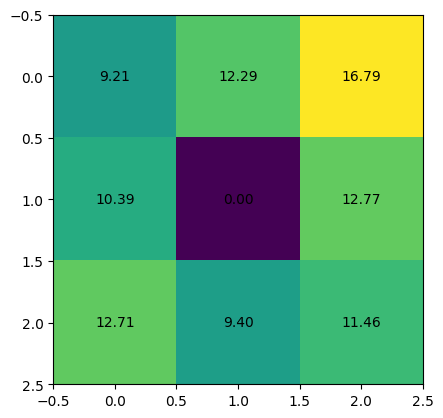

In [71]:
plt.imshow(graph, cmap=plt.cm.viridis, interpolation='nearest')
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{graph[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()